HOST_RESPONSE_RATE:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales
 

In [1]:
import pandas as pd

# Cargar únicamente la columna 'id' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_response_rate','host_is_superhost'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'id' existe en el DataFrame
if 'host_response_rate' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_response_rate'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_response_rate'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_response_rate'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_response_rate'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_response_rate'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_response_rate':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'host_response_rate' no existe en el DataFrame.")

Columna 'host_response_rate':
 - Tipo de dato: float64
 - Cantidad de nulos: 128782
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 91
 - Cantidad de datos totales: 279712


Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

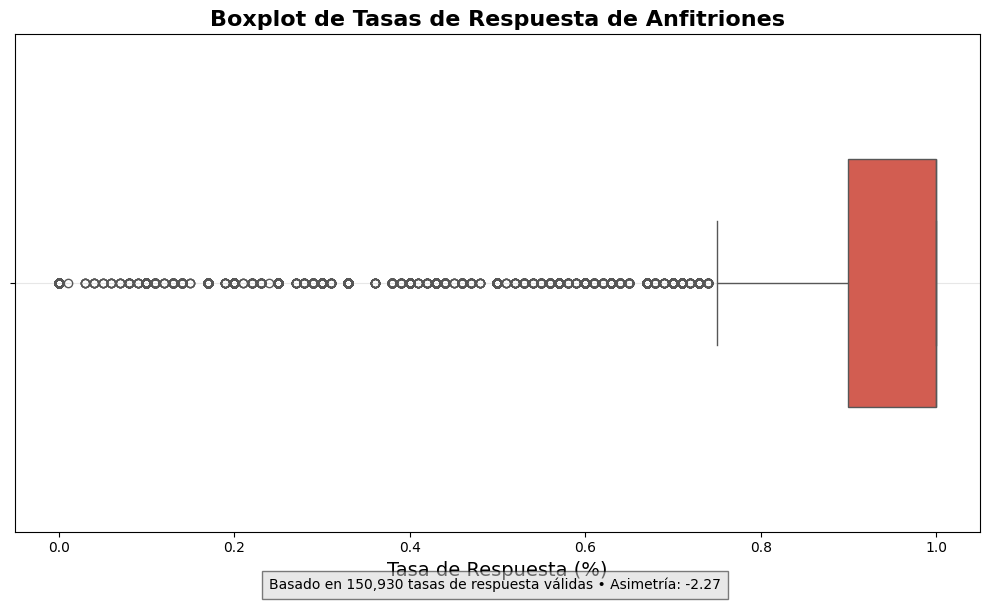

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Limpieza de datos
valores_validos = data['host_response_rate'].dropna()

# Crear la figura para el boxplot
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x=valores_validos, color='#e74c3c', width=0.5)

# Mejorar el aspecto visual
plt.title('Boxplot de Tasas de Respuesta de Anfitriones', fontsize=16, fontweight='bold')
plt.xlabel('Tasa de Respuesta (%)', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Añadir texto informativo sin mencionar específicamente los valores con flechas
total_valores = len(valores_validos)
plt.figtext(0.5, 0.01, f"Basado en {total_valores:,} tasas de respuesta válidas • Asimetría: {valores_validos.skew():.2f}", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

ANALISIS CUANTITATIVO CON OUTLIERS Y SIN ELIMINAR EL 0 PORQUE ES VALIDO QUE NO RESPONDAN

In [14]:
# Cantidad de filas antes de aplicar el filtro
total_antes = data['host_response_rate'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores iguales a 0
valores_validos = data['host_response_rate'].dropna()

# Cantidad de filas después de filtrar
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se eliminaron (nulos o 0)
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas en escala natural
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'host_response_rate' (escala natural):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")


Cantidad de valores eliminados (dropeados): 128782

Análisis Cuantitativo de 'host_response_rate' (escala natural):
 - Promedio: 0.87
 - Mínimo: 0.0
 - Máximo: 1.0
 - Desviación estándar: 0.28
 - Q1 (25%): 0.9
 - Q2 / Mediana (50%): 1.0
 - Q3 (75%): 1.0
 - Varianza: 0.08051083802239581
 - Curtosis (Kurtosis): 3.8327
 - Asimetría (Skewness): -2.2685


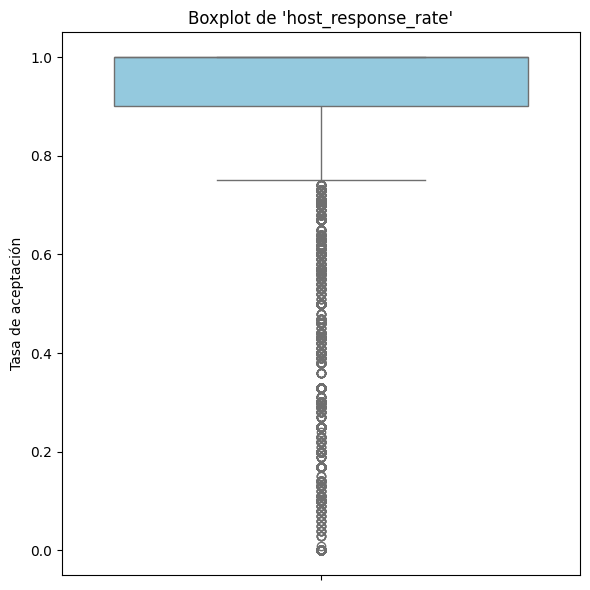

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Filtrar valores válidos (excluye solo nulos)
valores_validos = data['host_response_rate'].dropna()

# Dibujar boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_validos, color='skyblue')
plt.title("Boxplot de 'host_response_rate'")
plt.ylabel("Tasa de aceptación")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO SIN OUTLIERS

In [9]:
# 1. Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['host_response_rate'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 2. Cálculo de IQR y límites
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 4. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 5. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 6. Mostrar resultados
    print(f"Cantidad de outliers detectados: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'host_response_rate' (escala natural, sin outliers):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados: 23535

Análisis Cuantitativo de 'host_response_rate' (escala natural, sin outliers):
 - Promedio: 0.99
 - Mínimo: 0.9
 - Máximo: 1.0
 - Desviación estándar: 0.02
 - Q1 (25%): 1.0
 - Q2 / Mediana (50%): 1.0
 - Q3 (75%): 1.0
 - Varianza: 0.0006
 - Curtosis (Kurtosis): 6.9546
 - Asimetría (Skewness): -2.8668


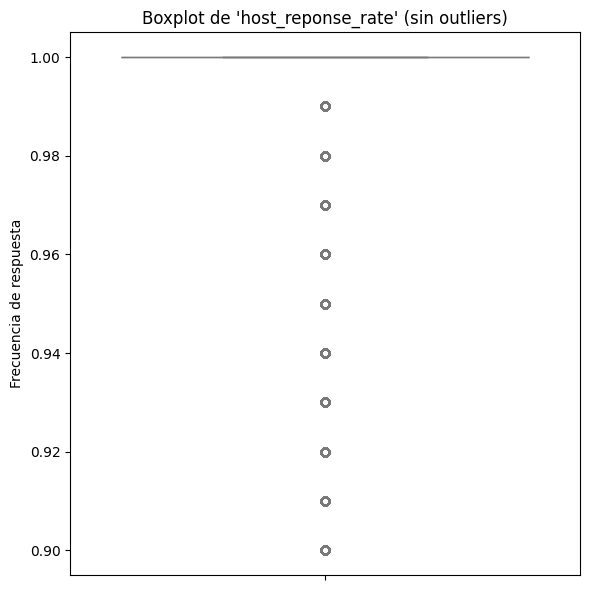

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reutilizamos los datos filtrados (sin nulos, sin ceros, sin outliers)
valores_validos = data['host_response_rate'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cálculo del IQR
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'host_reponse_rate' (sin outliers)")
plt.ylabel("Frecuencia de respuesta")
plt.tight_layout()
plt.show()


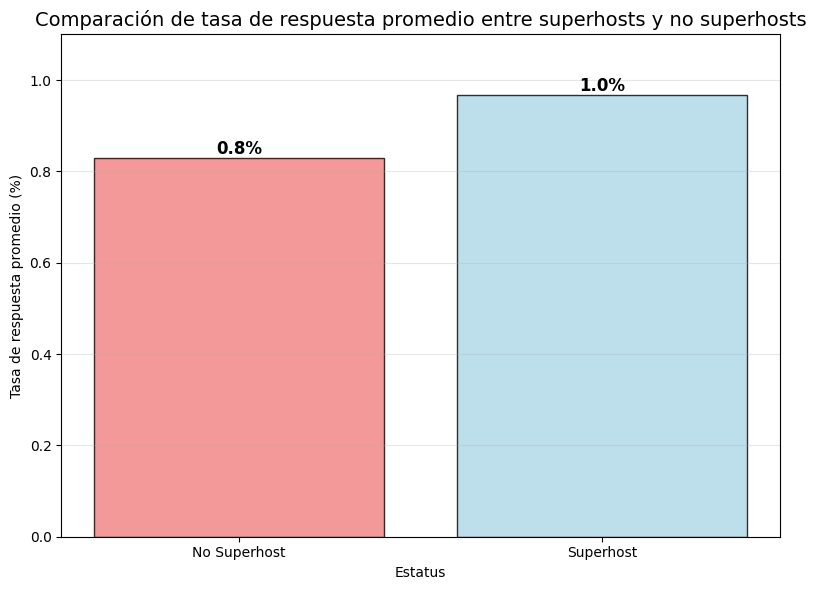

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la tasa de respuesta promedio por tipo de anfitrión
tasa_promedio = data.groupby('host_is_superhost')['host_response_rate'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(tasa_promedio.index, tasa_promedio.values, 
               color=['lightcoral', 'lightblue'], alpha=0.8)

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Comparación de tasa de respuesta promedio entre superhosts y no superhosts', fontsize=14)
plt.xlabel('Estatus')
plt.ylabel('Tasa de respuesta promedio (%)')
plt.grid(True, axis='y', alpha=0.3)

# Personalizar las etiquetas del eje x
plt.xticks([False, True], ['No Superhost', 'Superhost'])

# Ajustar el rango del eje Y para mejor visualización
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()